## 6. Command Line Question

As done in the previous assignment, we encourage using the command as a feature that Data Scientists must master.

Note: To answer the question in this section, you must strictly use command line tools. We will reject any other method of response. The final script must be placed in CommandLine.sh.

First, take the course_i.tsv files you created in point 1 and merge them using Linux commands (Hint: make sure that the first row containing the column names appears only once).

Now that you have your merged file named merged_courses.tsv, use Linux commands to answer the following questions:
- Which country offers the most Master's Degrees? Which city?
- How many colleges offer Part-Time education?
- Print the percentage of courses in Engineering (the word "Engineer" is contained in the course's name).

__Important note:__ You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable. Please run the script and include a __screenshot__ of the <ins>output</ins> in the notebook for evaluation.

### **Command Line Script Analysis**

All scripts will be contained within `CommandLine.sh`, which is used for analyzing the scripts.

Firstly, let's write a script to merge all our courses into a single `.tsv` file. We will write the contents of the first course into `merged_courses.tsv`. This action is performed outside the for loop with two considerations in mind:

1. If a `merged_courses.tsv` file already exists, it will be overwritten with the new file containing only the contents of `course_1.tsv`.
2. At the top of the file, we need the names of the columns. Since every file's first line contains these column names, we use the `tail` command within the for loop to extract the last two lines of each `courses_i.tsv` file. Extracting two lines is necessary because there is always a newline character at the end of each `courses_i.tsv` file, and we also need to include the line containing the content.


In [3]:
%%bash
cat TSV/course_1.tsv > merged_courses.tsv
for i in {2..6000}
do
   tail +2 TSV/course_${i}.tsv >> merged_courses.tsv
done

For the first part, we need to identify the country and city that offer the most Master's Degrees. The process is similar for both, differing only in the column used. 

Firstly, we use `echo` to display "Country: " or "City: ", ensuring we do not echo a trailing newline. Then, `cut` is employed to extract the required column. We sort this column, and then use `uniq` with the `-c` option to count unique entries. Next, we sort these counts in reverse order (`sort -nr`), so the country or city with the highest number of Master's courses appears at the top. 

Since we're interested only in the first entry, which has the highest count, we use `head -1` to retrieve it. Finally, for better formatting and readability, `awk` is used to process and display the output.


In [30]:
%%bash  
echo -n "Country that offers most Master's Degrees: "
cut -f11 merged_courses.tsv | sort | uniq -c | sort -nr | head -1 | awk '{print substr($0, index($0,$2)) ", number of occurrences: " $1}'
echo -n "City that offers most Master's Degrees: "
cut -f10 merged_courses.tsv | sort | uniq -c | sort -nr | head -1 | awk '{print substr($0, index($0,$2)) ", number of occurrences: " $1}'

Country that offers most Master's Degrees: United Kingdom, number of occurrences: 4485
City that offers most Master's Degrees: London, number of occurrences: 1085


Now, we need to identify all universities that offer part-time courses. To do this, we will use `awk` to search through all courses. We'll employ a regular expression to match entries with `part time` or `part-time`. Our focus is on the universities listed in column 2, so we'll extract these.

Next, we sort these university names and then use `uniq` to filter out duplicates, thereby compiling a list that represents the number of unique courses offered. Finally, we count the number of universities in this list and store this figure in the `part_time` variable.

In [27]:
%%bash
part_time=$(awk -F'\t' 'tolower($0) ~ /part[- ]time/ {print $2}' merged_courses.tsv | sort | uniq | wc -l)
echo "Number of universities that offer part-time courses: ${part_time}"

Number of universities that offer part-time courses: 153


For our final task, we will work with two variables. The first one, `total_courses`, calculates the total number of courses in the dataset. Importantly, it excludes the header row and any lines that have no values. The second variable, `engineering_courses`, counts all courses containing the term `engineer` in their course name.

We then calculate the percentage of engineering courses, accurate to two decimal places. Finally, we echo the calculated percentage to display the result. Below the script is the screenshot of `CommandLine.sh` running in terminal.

In [26]:
%%bash
total_courses=$(awk -F'\t' 'NR > 1 && $1 != ""' merged_courses.tsv | wc -l)
engineering_courses=$(awk -F '\t' 'tolower($1) ~ /engineer/' merged_courses.tsv | wc -l)
percentage=$(echo "scale=2; $engineering_courses * 100 / $total_courses" | bc)
echo "Percentage of engineering courses: $percentage%"

Percentage of engineering courses: 10.32%


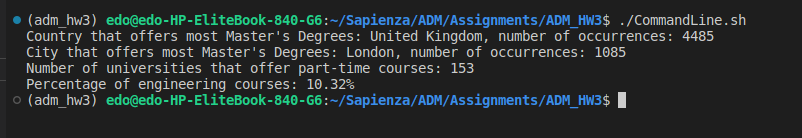